In [3]:
!pip install geopandas plotly matplotlib

In [4]:
import geopandas as gpd

In [39]:
from shapely.geometry import Point,Polygon

In [41]:
import matplotlib.pyplot as plt

In [42]:
data = {
    'Latitude': [38.297, -3.295, 35.689, -16.5, 60.1],
    'Longitude': [-122.285, 36.795, 140.692, -72.5, -149.5],
    'Place': ['California', 'Spain', 'Japan', 'Chile', 'Alaska']
}

In [43]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gpd_points = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

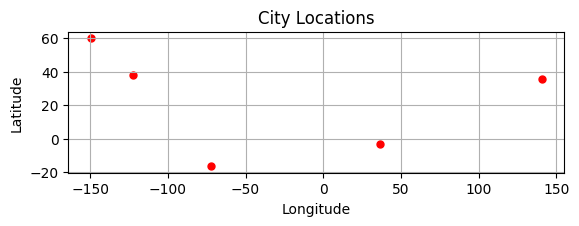

In [44]:
gpd_points.plot(marker='o', color='red', markersize=25)
plt.title("City Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [126]:
data1 = {
    'Latitude': [38.297, 40.4637, 35.689, -16.5, 60.1],
    'Longitude': [-122.285, -3.7492, 140.692, -72.5, -149.5],
    'Magnitude': [6.5, 8.3, 7.1, 6.8, 7.5,7.9,6.9],
    'Place': ['California', 'Spain', 'Japan', 'Chile', 'Alaska']
}

In [127]:
polygon = Polygon([(-150, 60), (-150, -20), (150, 0), (150, 60)])

In [128]:
gdf_buffer = gpd.GeoDataFrame(index=[0],geometry=[polygon])

In [129]:
gdf_buffer = gpd_points.copy()
gdf_buffer['geometry'] = gdf_buffer.buffer(5)

/tmp/ipython-input-864202743.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [130]:
gdf_wihtin_polygon = gpd_points.geometry.within(polygon)

In [131]:
gpd_points['in_polygon'] = gpd_points.geometry.apply(lambda x: polygon.contains(x))

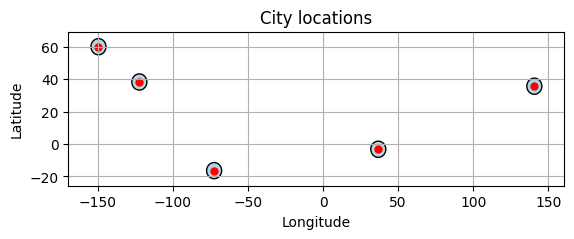

In [132]:
fig, ax = plt.subplots()
gdf_buffer.plot(ax=ax,facecolor='lightblue',edgecolor='black')
gpd_points.plot(ax=ax, marker='o', color='red', markersize=25)
plt.title("City locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [133]:
print(gdf_wihtin_polygon)

0     True
1     True
2     True
3    False
4    False
dtype: bool


In [134]:
import plotly.graph_objects as go
import pandas as pd

In [135]:
data1 = {
    'Latitude': [38.297, 40.4637, 35.689, -16.5, 60.1],
    'Longitude': [-122.285, -3.7492, 140.692, -72.5, -149.5],
    'Magnitude': [6.5, 8.3, 7.1, 6.8, 7.5],
    'Depth_km': [10.0, 25.0, 50.0, 30.0, 20.0],
    'Place': ['California', 'Spain', 'Japan', 'Chile', 'Alaska']
}

In [136]:
df = pd.DataFrame(data1)

In [137]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
    lon = df['Longitude'],
    lat = df['Latitude'],
    text = df['Place'] + '<br>Magnitude:' + df['Magnitude'].astype(str),
    marker = dict(
        size = df['Magnitude'] * 2,
        color = df['Magnitude'],
        colorscale = 'Viridis',
        showscale = True,
        colorbar_title = 'Magnitude',
        line_color = "black",
        line_width = 0.5,
        sizemode = 'area'
    ),
    mode = 'markers'
))

fig.update_layout(
    title = 'Earthquake Magnitudes Around the World',
    geo_scope='world',
)

fig.show()

In [138]:
fig.update_layout(
    title = '3D Visualization of Earthquakes',
   geo = dict(
        projection_type = 'orthographic',
        showland = True,
        landcolor = 'white',
        oceancolor = 'lightblue',
        showcountries = True,
        countrycolor = 'black',
        showocean = True,
    ),
    scene = dict(
        xaxis_title = 'Longitude',
        yaxis_title = 'Latitude',
        zaxis_title = 'Magnitude'
    ),
)

In [143]:
# Save the 3D visualization to an HTML file
html_out = "3D Visualization of Earthquakes.html"
fig.write_html(html_out)
print(f"✅ 3D visualization exported to {html_out}")

# If using Google Colab → auto-download to your computer
from google.colab import files
files.download(html_out)

✅ 3D visualization exported to 3D Visualization of Earthquakes.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The strongest and most frequent earthquakes cluster around the Pacific Ring of Fire — including Japan, Indonesia, Chile, and Alaska — and in the Mediterranean-Asian belt.

 These regions are along major tectonic plate boundaries where subduction and collision occur, resulting in frequent, high-magnitude quakes. Recognizing these zones is vital for international relief planning, as densely populated coastal areas and island nations in these zones are highly vulnerable to infrastructure damage, tsunamis, and humanitarian crises.
Pre-positioning aid, building resilient infrastructure, and improving regional coordination can drastically reduce response time and casualties during future disasters.